# Train Run

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Importing Train Dataset

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Project/4.Microsoft/train_sample.csv')

In [ ]:
df_train.shape

(4758418, 46)

In [ ]:
df_train.head(3)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630


In [ ]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

## Data Cleaning and Data PreProcessing

In [ ]:
null_values_in_cent = pd.DataFrame({
    'Null_values_Count' : df_train.isnull().sum(),
    'Null_values_Percentage' : df_train.isnull().sum()/len(df_train)*100
})

null_values_in_cent

,Null_values_Count,Null_values_Percentage
Id,0,0.000000
OrgId,0,0.000000
IncidentId,0,0.000000
AlertId,0,0.000000
Timestamp,0,0.000000
DetectorId,0,0.000000
AlertTitle,0,0.000000
Category,0,0.000000
MitreTechniques,2733136,57.437913
IncidentGrade,25775,0.541672


In [ ]:
# Removing 50% of the Null values
threshold= len(df_train)* 0.5
df_train = df_train.dropna(thresh=threshold,axis=1)

In [ ]:
df_train.shape

(4758418, 35)

In [ ]:
df_train.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,25775
EntityType,0


In [ ]:
df_train['IncidentGrade'].isnull().sum()

25775

In [ ]:
# Droping rows where 'IncidentGrade' is missing
df_train = df_train.dropna(subset=['IncidentGrade'])
df_train['IncidentGrade'].isnull().sum()

0

In [ ]:
df_train.duplicated().sum()

155243

In [ ]:
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [ ]:
df_train.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0


### Changing the Dtype

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577400 entries, 0 to 4758417
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [ ]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'])
df_train['Timestamp'].dtype

datetime64[ns, UTC]

In [ ]:
df_train['Day'] = df_train['Timestamp'].dt.day
df_train['Month'] = df_train['Timestamp'].dt.month
df_train['Year'] = df_train['Timestamp'].dt.year
df_train['Hour'] = df_train['Timestamp'].dt.hour
df_train['Time'] = df_train['Timestamp'].dt.time

In [ ]:
df_train = df_train.drop('Timestamp', axis=1)

In [ ]:
df_train

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,9,6,2024,2,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,10,6,2024,10,10:25:17
4758414,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,11,6,2024,19,19:30:52
4758415,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,9,6,2024,4,04:27:41
4758416,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,21,5,2024,23,23:01:11


### Checking Categorical Columns

In [ ]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [ ]:
df_train[categorical_cols].describe()

,Category,IncidentGrade,EntityType,EvidenceRole,Time
count,4577400,4577400,4577400,4577400,4577400
unique,20,3,31,2,86400
top,InitialAccess,BenignPositive,Ip,Related,01:27:49
freq,1990165,1973943,1088602,2491054,5688


In [ ]:
df_train['EvidenceRole'].value_counts()

,count
EvidenceRole,
Related,2491054
Impacted,2086346


In [ ]:
df_train['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,1973943
TruePositive,1608957
FalsePositive,994500


In [ ]:
print(df_train['Day'].value_counts())

Day
4     445405
5     437266
3     375272
6     357168
11    348652
10    335512
12    324889
13    314137
7     307421
9     222014
14    221308
8     216287
15     80969
16     67630
26     57036
2      49540
24     49484
25     48924
23     42018
31     40717
27     35398
21     32824
20     31129
22     28549
1      28095
30     25083
29     20298
17     19358
28     14863
19       110
18        44
Name: count, dtype: int64


In [ ]:
df_train['Month'].value_counts()

,count
Month,
6,4150040
5,426681
2,162
1,155
4,153
3,126
12,78
11,5


In [ ]:
df_train['Year'].value_counts()

,count
Year,
2024,4577317
2023,83


## EDA

In [ ]:
for col in df_train.columns:
  print(f"{col} : {df_train[col].nunique()}")

Id : 642342
OrgId : 5236
IncidentId : 421530
AlertId : 1150459
DetectorId : 7369
AlertTitle : 74710
Category : 20
IncidentGrade : 3
EntityType : 31
EvidenceRole : 2
DeviceId : 55204
Sha256 : 73078
IpAddress : 195384
Url : 85332
AccountSid : 265788
AccountUpn : 394186
AccountObjectId : 257733
AccountName : 272375
DeviceName : 80956
NetworkMessageId : 260032
RegistryKey : 937
RegistryValueName : 401
RegistryValueData : 496
ApplicationId : 1003
ApplicationName : 1610
OAuthApplicationId : 416
FileName : 142641
FolderPath : 59652
ResourceIdName : 1497
OSFamily : 6
OSVersion : 48
CountryCode : 212
State : 1197
City : 7107
Day : 31
Month : 8
Year : 2
Hour : 24
Time : 86400


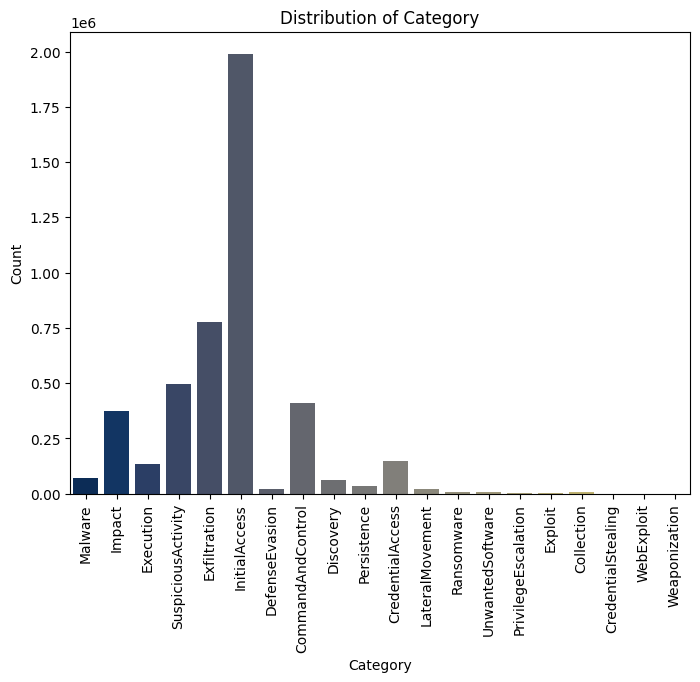

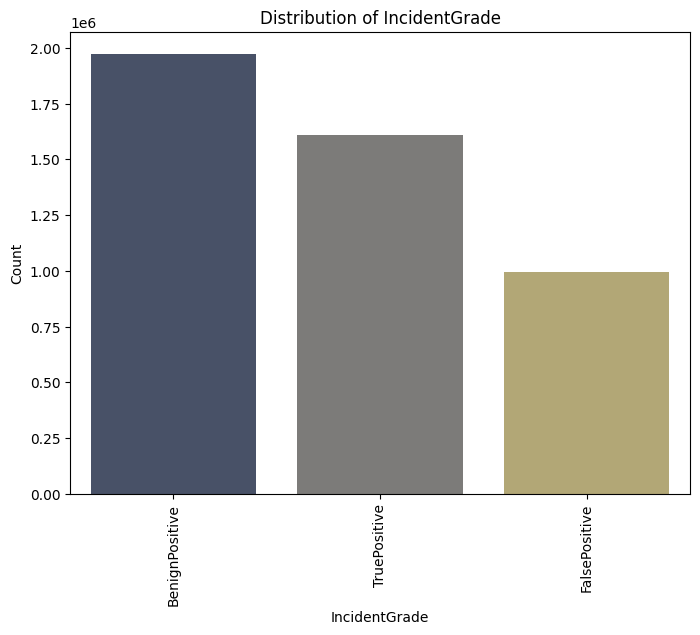

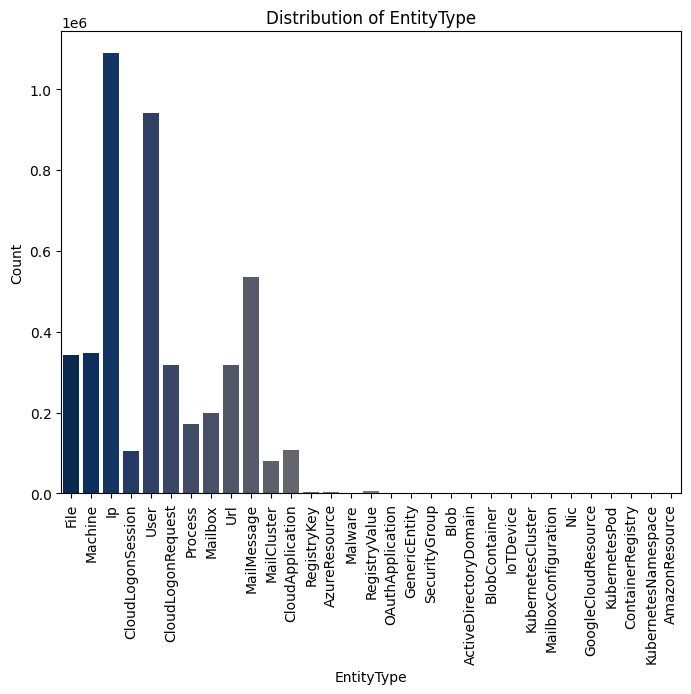

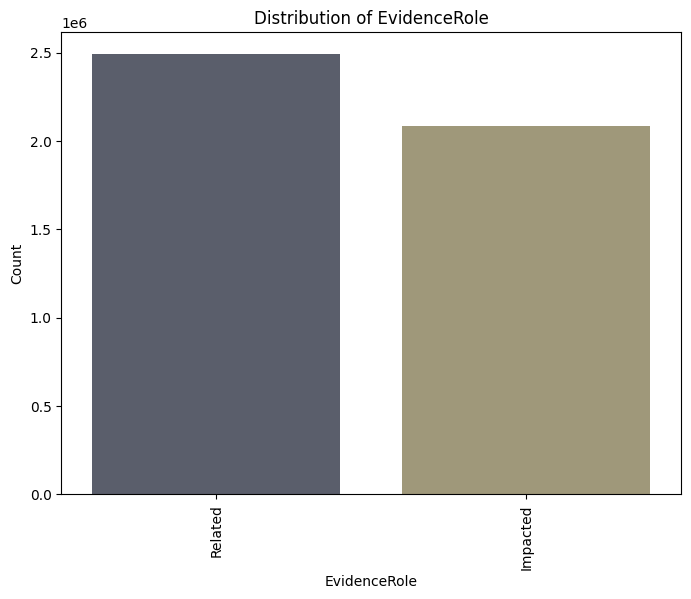

In [ ]:
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
# Plot each categorical column separately
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_train, palette='cividis')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

<Figure size 1200x600 with 0 Axes>

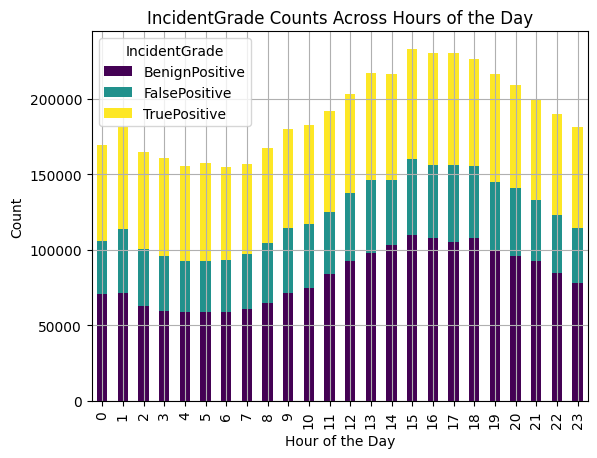

<Figure size 1200x600 with 0 Axes>

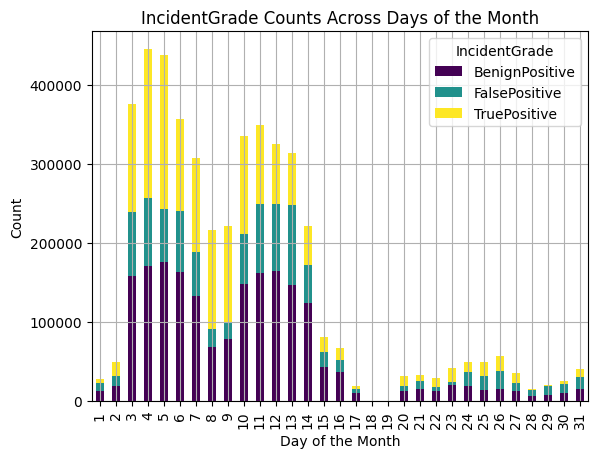

<Figure size 1200x600 with 0 Axes>

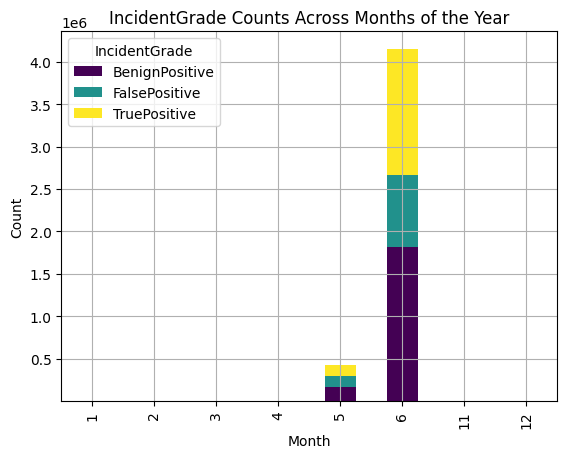

<Figure size 1200x600 with 0 Axes>

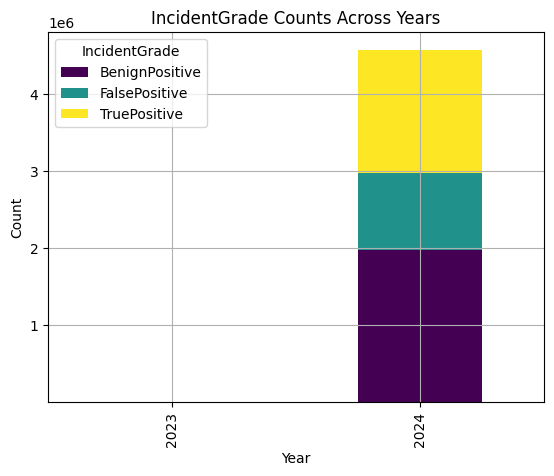

In [ ]:
# Aggregate data
hour_incident_grade = df_train.groupby(['Hour', 'IncidentGrade']).size().unstack()
day_incident_grade = df_train.groupby(['Day', 'IncidentGrade']).size().unstack()
month_incident_grade = df_train.groupby(['Month', 'IncidentGrade']).size().unstack()
year_incident_grade = df_train.groupby(['Year', 'IncidentGrade']).size().unstack()

# Hourly distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
hour_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# Daily distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
day_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Days of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# Monthly distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
month_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Months of the Year")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# Year distribution (staked bar plot)
plt.figure(figsize=(12, 6))
year_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

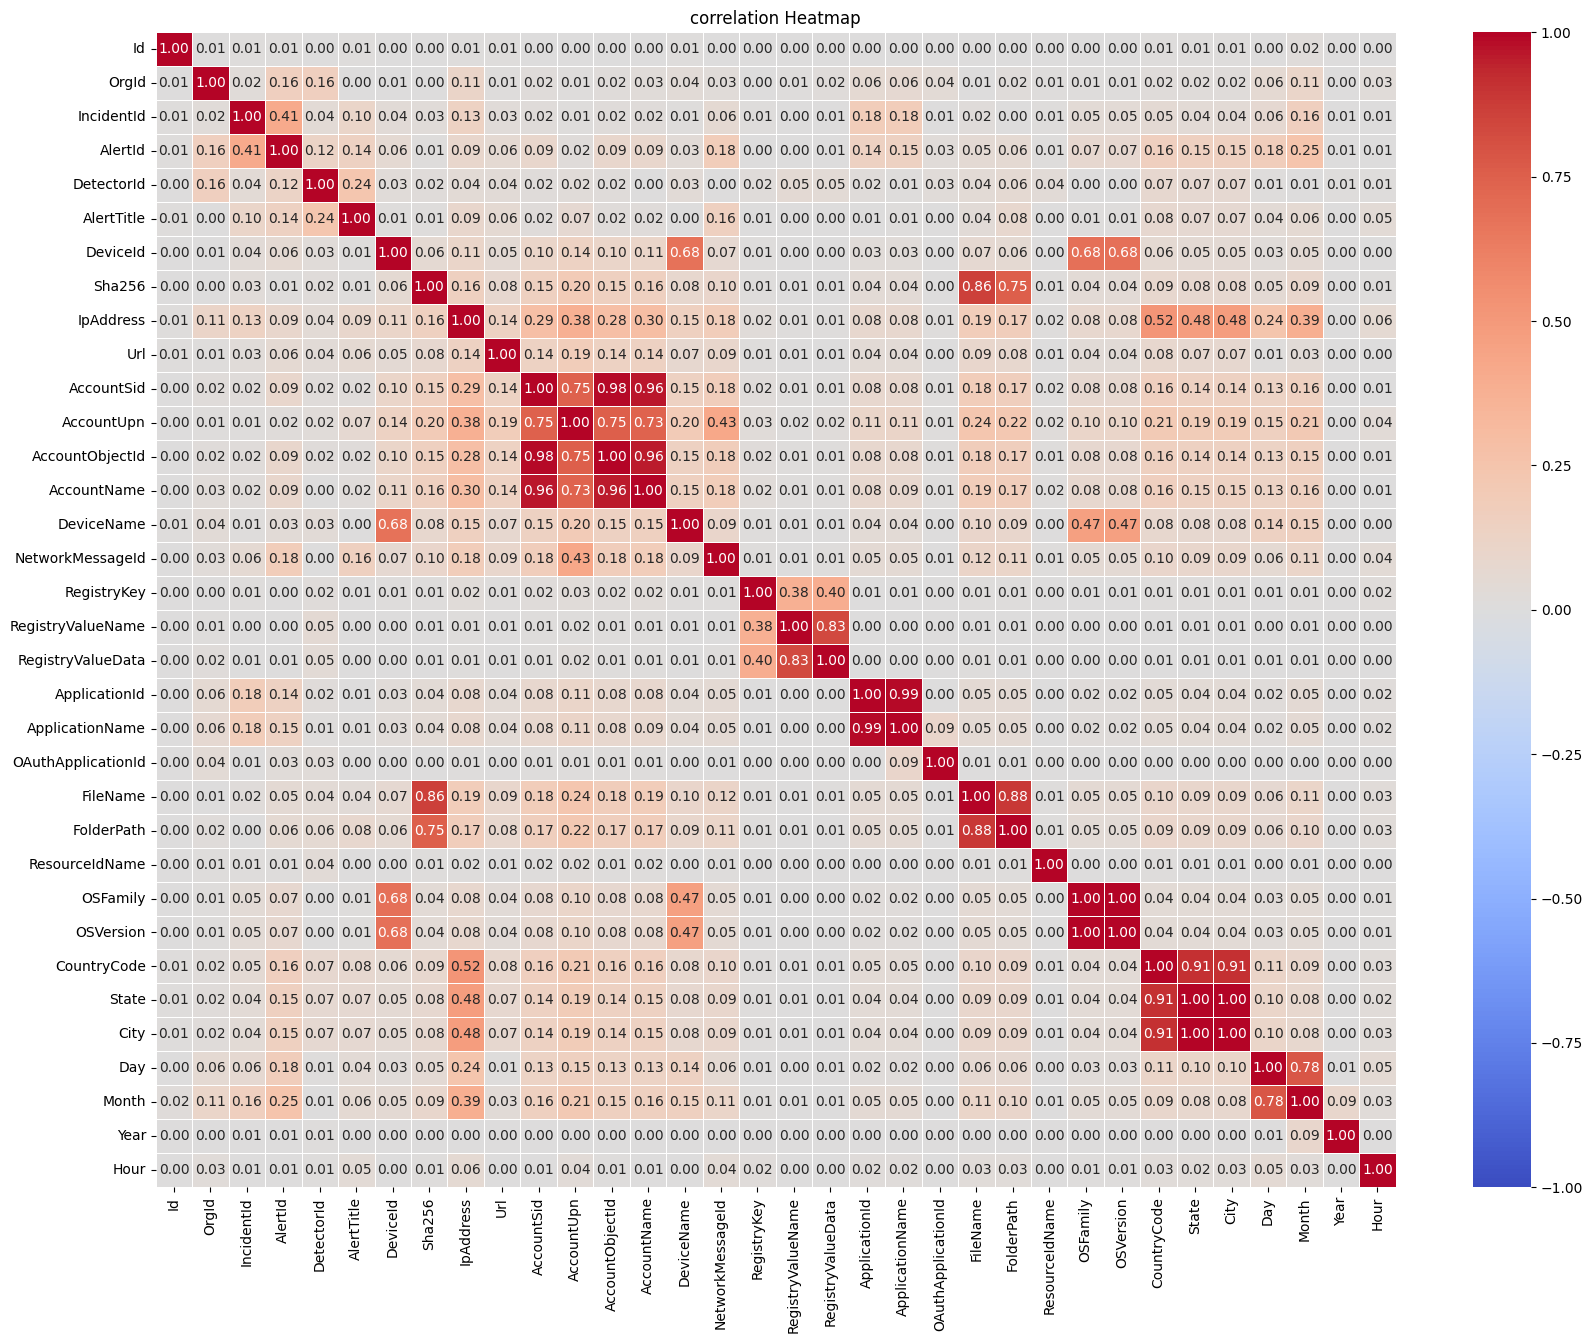

In [ ]:
# selecting numerical col
numeric_df = df_train.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
df_train.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,9,6,2024,2,02:48:01


In [ ]:
# removing unwanted columns like ID and timedate dased for model training
# i kept some of the id's and name because to know whether where the spam mail comes from
selected_columns = [
    'AlertTitle', 'Category', 'EvidenceRole', 'EntityType', 'OSFamily', 'CountryCode',
    'Url', 'AccountName','DeviceName', 'IncidentGrade']
df_train = df_train[selected_columns]

In [ ]:
df_train.shape

(4577400, 10)

In [ ]:
df_train.head(1)

,AlertTitle,Category,EvidenceRole,EntityType,OSFamily,CountryCode,Url,AccountName,DeviceName,IncidentGrade
0,813,Malware,Related,File,5,242,160396,453297,153085,BenignPositive


## Encoding

In [ ]:
df_train.head()

,AlertTitle,Category,EvidenceRole,EntityType,OSFamily,CountryCode,Url,AccountName,DeviceName,IncidentGrade
0,813,Malware,Related,File,5,242,160396,453297,153085,BenignPositive
1,25,Impact,Impacted,Machine,5,242,160396,453297,3142,BenignPositive
2,444,Execution,Impacted,Machine,5,242,160396,453297,4181,BenignPositive
3,1233,SuspiciousActivity,Related,File,5,242,160396,453297,153085,TruePositive
4,58829,Exfiltration,Impacted,File,5,242,160396,453297,153085,BenignPositive


In [ ]:
categorical_columns = ['AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'OSFamily', 'CountryCode']

In [ ]:
# List of columns to process
columns_to_group = ['AlertTitle', 'Url', 'AccountName', 'DeviceName', 'CountryCode']

# Looping through each column and grouping the less frequent values into "Others"
for column in columns_to_group:
    category_counts = df_train[column].value_counts()
    top_categories = category_counts.nlargest(5).index
    df_train[column] = df_train[column].where(df_train[column].isin(top_categories), 'Others')

# Now verifing the changes
df_train

,AlertTitle,Category,EvidenceRole,EntityType,OSFamily,CountryCode,Url,AccountName,DeviceName,IncidentGrade
0,Others,Malware,Related,File,5,242,160396,453297,153085,BenignPositive
1,Others,Impact,Impacted,Machine,5,242,160396,453297,Others,BenignPositive
2,Others,Execution,Impacted,Machine,5,242,160396,453297,Others,BenignPositive
3,Others,SuspiciousActivity,Related,File,5,242,160396,453297,153085,TruePositive
4,Others,Exfiltration,Impacted,File,5,242,160396,453297,153085,BenignPositive
...,...,...,...,...,...,...,...,...,...,...
4758413,Others,Exfiltration,Impacted,MailMessage,5,242,160396,453297,153085,FalsePositive
4758414,2,CommandAndControl,Impacted,User,5,242,160396,Others,153085,FalsePositive
4758415,1,InitialAccess,Related,MailMessage,5,242,160396,453297,153085,BenignPositive
4758416,Others,Impact,Related,Ip,5,242,160396,453297,153085,BenignPositive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['IncidentGrade'] = le.fit_transform(df_train['IncidentGrade'])


# One-Hot Encoding for nominal features
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

In [ ]:
df_train.head()

,IncidentGrade,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_Others,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,Category_Weaponization,Category_WebExploit,EntityType_AmazonResource,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_ContainerRegistry,EntityType_File,EntityType_GenericEntity,EntityType_GoogleCloudResource,EntityType_IoTDevice,EntityType_Ip,EntityType_KubernetesCluster,EntityType_KubernetesNamespace,EntityType_KubernetesPod,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Related,Url_1,Url_2,Url_6,Url_160396,Url_Others,AccountName_1,AccountName_2,AccountName_3,AccountName_453297,AccountName_Others,DeviceName_1,DeviceName_4,DeviceName_5,DeviceName_153085,DeviceName_Others,OSFamily_1,OSFamily_2,OSFamily_3,OSFamily_4,OSFamily_5,CountryCode_1,CountryCode_2,CountryCode_4,CountryCode_242,CountryCode_Others
0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
2,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
3,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
4,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
df_train.shape

(4577400, 81)

In [ ]:
df_train.head()

,IncidentGrade,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_Others,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,Category_Weaponization,Category_WebExploit,EntityType_AmazonResource,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_ContainerRegistry,EntityType_File,EntityType_GenericEntity,EntityType_GoogleCloudResource,EntityType_IoTDevice,EntityType_Ip,EntityType_KubernetesCluster,EntityType_KubernetesNamespace,EntityType_KubernetesPod,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Related,Url_1,Url_2,Url_6,Url_160396,Url_Others,AccountName_1,AccountName_2,AccountName_3,AccountName_453297,AccountName_Others,DeviceName_1,DeviceName_4,DeviceName_5,DeviceName_153085,DeviceName_Others,OSFamily_1,OSFamily_2,OSFamily_3,OSFamily_4,OSFamily_5,CountryCode_1,CountryCode_2,CountryCode_4,CountryCode_242,CountryCode_Others
0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
2,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
3,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
4,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False


## Saving this TrainDataset in joblib

In [ ]:
df_train = df_train.reset_index(drop=True)

In [ ]:
import joblib
joblib.dump(df_train, '/content/drive/MyDrive/Project/4.Microsoft/encoded_train_data.joblib')

['/content/drive/MyDrive/Project/4.Microsoft/encoded_train_data.joblib']

In [ ]:
df_train = joblib.load('/content/drive/MyDrive/Project/4.Microsoft/encoded_train_data.joblib')
df_train.head()

,IncidentGrade,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_Others,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,Category_Weaponization,Category_WebExploit,EntityType_AmazonResource,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_ContainerRegistry,EntityType_File,EntityType_GenericEntity,EntityType_GoogleCloudResource,EntityType_IoTDevice,EntityType_Ip,EntityType_KubernetesCluster,EntityType_KubernetesNamespace,EntityType_KubernetesPod,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_Nic,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User,EvidenceRole_Related,Url_1,Url_2,Url_6,Url_160396,Url_Others,AccountName_1,AccountName_2,AccountName_3,AccountName_453297,AccountName_Others,DeviceName_1,DeviceName_4,DeviceName_5,DeviceName_153085,DeviceName_Others,OSFamily_1,OSFamily_2,OSFamily_3,OSFamily_4,OSFamily_5,CountryCode_1,CountryCode_2,CountryCode_4,CountryCode_242,CountryCode_Others
0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
2,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
3,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
4,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False


In [ ]:
df_train.shape

(4577400, 81)